# Mushroom Classification
 
## Identifying a mushroom as edible or poisonous
## The dataset is from UCI Machine Learning Repository
## https://archive.ics.uci.edu/ml/datasets/Mushroom

In [1]:
#import relevant libraries. Initial data analysis is done before feeding into ANN for binary logistical regression

import numpy as np
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport

In [2]:
df = pd.read_csv("./data/agaricus-lepiota.data")

In [3]:
df.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [4]:
df.columns

Index(['p', 'x', 's', 'n', 't', 'p.1', 'f', 'c', 'n.1', 'k', 'e', 'e.1', 's.1',
       's.2', 'w', 'w.1', 'p.2', 'w.2', 'o', 'p.3', 'k.1', 's.3', 'u'],
      dtype='object')

#### There are 23 columns with abbreviated headings and first column is the target label(e-edible, p-poisonous)

In [5]:
df.describe()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
count,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,...,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3655,3244,2283,4748,3528,7913,6811,5612,1728,...,4935,4463,4383,8123,7923,7487,3967,2388,4040,3148


#### Let's convert the cryptic headings to a readable ones for easy understanding as we progress

In [6]:
cols = ["edible-poison", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment", "gill-spacing", 
        "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", 
        "stalk-color-above-ring","stalk-color-below-ring", "veil-type", "veil-color", "ring-number", "ring-type", 
        "spore-print-color","population", "habitat"]

In [7]:
df.columns = cols

In [8]:
df.head()

,edible-poison,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edible-poison             8123 non-null   object
 1   cap-shape                 8123 non-null   object
 2   cap-surface               8123 non-null   object
 3   cap-color                 8123 non-null   object
 4   bruises                   8123 non-null   object
 5   odor                      8123 non-null   object
 6   gill-attachment           8123 non-null   object
 7   gill-spacing              8123 non-null   object
 8   gill-size                 8123 non-null   object
 9   gill-color                8123 non-null   object
 10  stalk-shape               8123 non-null   object
 11  stalk-root                8123 non-null   object
 12  stalk-surface-above-ring  8123 non-null   object
 13  stalk-surface-below-ring  8123 non-null   object
 14  stalk-color-above-ring  

In [10]:
df.groupby(by=['edible-poison']).count()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
edible-poison,,,,,,,,,,,,,,,,,,,,,
e,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208,...,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208
p,3915,3915,3915,3915,3915,3915,3915,3915,3915,3915,...,3915,3915,3915,3915,3915,3915,3915,3915,3915,3915


#### We have equal number of edible and poisonous samples. Let's see if there are any missing values or redundant columns that could be removed from the set. 

In [11]:
profile = ProfileReport(df)

In [12]:
profile

#### We can drop veil-type as it is constant for all the samples. Also, there are no strong reason to drop any other columns as all of them are categorical

In [13]:


df = df.drop(['veil-type'], axis=1)

In [14]:
df

,edible-poison,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,s,w,w,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,s,o,o,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,s,o,o,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,s,o,o,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,s,k,w,w,w,o,e,w,v,l


In [15]:
sns.set_style('whitegrid')

In [16]:
df.groupby(by=['odor']).count()

,edible-poison,cap-shape,cap-surface,cap-color,bruises,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
odor,,,,,,,,,,,,,,,,,,,,,
a,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
c,192,192,192,192,192,192,192,192,192,192,...,192,192,192,192,192,192,192,192,192,192
f,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,...,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160
l,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
m,36,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
n,3528,3528,3528,3528,3528,3528,3528,3528,3528,3528,...,3528,3528,3528,3528,3528,3528,3528,3528,3528,3528
p,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
s,576,576,576,576,576,576,576,576,576,576,...,576,576,576,576,576,576,576,576,576,576
y,576,576,576,576,576,576,576,576,576,576,...,576,576,576,576,576,576,576,576,576,576


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edible-poison             8123 non-null   object
 1   cap-shape                 8123 non-null   object
 2   cap-surface               8123 non-null   object
 3   cap-color                 8123 non-null   object
 4   bruises                   8123 non-null   object
 5   odor                      8123 non-null   object
 6   gill-attachment           8123 non-null   object
 7   gill-spacing              8123 non-null   object
 8   gill-size                 8123 non-null   object
 9   gill-color                8123 non-null   object
 10  stalk-shape               8123 non-null   object
 11  stalk-root                8123 non-null   object
 12  stalk-surface-above-ring  8123 non-null   object
 13  stalk-surface-below-ring  8123 non-null   object
 14  stalk-color-above-ring  

<AxesSubplot:xlabel='edible-poison', ylabel='count'>

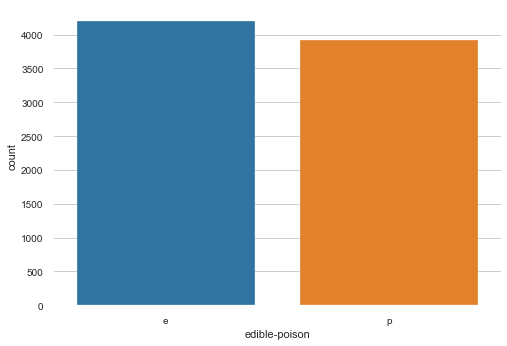

In [18]:
sns.countplot(x='edible-poison',data=df)

#### Explore if any strong co-relation to odor and the edible/poison. From the plot, odor=none(r) seem to indicate mostly edible, but not 100%.Almond(a), anise(l) are edible 100%. Pungent(g), foul(p), creosote(b), fishy(y), spicy(s) are definitely poisonous

<AxesSubplot:xlabel='edible-poison', ylabel='count'>

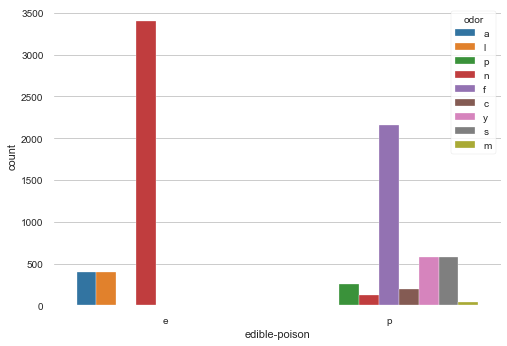

In [19]:
sns.countplot(x='edible-poison',data=df,hue='odor')

In [20]:
#Change the first column to 0 or 1 to reflect the outcome of the predictions 0- edible, 1- poisonous

df['edible-poison'] = df['edible-poison'].map({'e':0, 'p':1})

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edible-poison             8123 non-null   int64 
 1   cap-shape                 8123 non-null   object
 2   cap-surface               8123 non-null   object
 3   cap-color                 8123 non-null   object
 4   bruises                   8123 non-null   object
 5   odor                      8123 non-null   object
 6   gill-attachment           8123 non-null   object
 7   gill-spacing              8123 non-null   object
 8   gill-size                 8123 non-null   object
 9   gill-color                8123 non-null   object
 10  stalk-shape               8123 non-null   object
 11  stalk-root                8123 non-null   object
 12  stalk-surface-above-ring  8123 non-null   object
 13  stalk-surface-below-ring  8123 non-null   object
 14  stalk-color-above-ring  

#### Since all of the features are categorical, they need to one-hot encoded for further processing.

In [22]:
dummies = pd.get_dummies(df[["cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment", "gill-spacing", 
        "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", 
        "stalk-color-above-ring","stalk-color-below-ring", "veil-color", "ring-number", "ring-type", 
        "spore-print-color","population", "habitat" ]])
df = df.drop(["cap-shape","cap-surface", "cap-color", "bruises", "odor", "gill-attachment", "gill-spacing", 
        "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", 
        "stalk-color-above-ring","stalk-color-below-ring", "veil-color", "ring-number", "ring-type", 
        "spore-print-color","population", "habitat"], axis=1)
df = pd.concat([df,dummies], axis=1)

In [23]:
df.head()

,edible-poison,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Training
#### Once the featutes are one-hot encoded, we are left with 117 columns, of which the first column is the label and the rest features. Split them into train and test sets for training using standard sklearn library. Train=60%, validation=20%, test=20%

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
#Pick up feature set and the labels
X = df.drop('edible-poison',axis=1).values
y = df['edible-poison'].values

In [26]:
#Split the dataset into 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

#Take out validation set from training set. Final division training:validation:testing = 60:20:20
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=101)

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
X_train.shape

(4873, 116)

In [29]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

#### A simple ANN with one hidden layer will suffice. Input layer has 40 nodes and hidden layer 20, and output layer 1 for binary classification. Dropout() also used to avoid overfitting. Output layer will have 'sigmoid' activation whereas internal nodes 'ReLU' activation. 40->20->1

In [30]:
model = Sequential()

# input layer
model.add(Dense(40,  activation='relu'))
model.add(Dropout(0.5))

# hidden layer
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.5))


# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [31]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=20,
          batch_size=128,
          validation_data=(X_val, y_val),
          callbacks=[early_stop]
          )

Epoch 1/20
39/39 [==============================] - 0s 6ms/step - loss: 0.6239 - val_loss: 0.4480
Epoch 2/20
39/39 [==============================] - 0s 2ms/step - loss: 0.4028 - val_loss: 0.2148
Epoch 3/20
39/39 [==============================] - 0s 3ms/step - loss: 0.2440 - val_loss: 0.1116
Epoch 4/20
39/39 [==============================] - 0s 2ms/step - loss: 0.1536 - val_loss: 0.0622
Epoch 5/20
39/39 [==============================] - 0s 2ms/step - loss: 0.1015 - val_loss: 0.0353
Epoch 6/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0724 - val_loss: 0.0229
Epoch 7/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0565 - val_loss: 0.0175
Epoch 8/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0405 - val_loss: 0.0136
Epoch 9/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0335 - val_loss: 0.0109
Epoch 10/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0263 - val_loss: 0.0096
Epoch 11/20
39/39 [

In [32]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

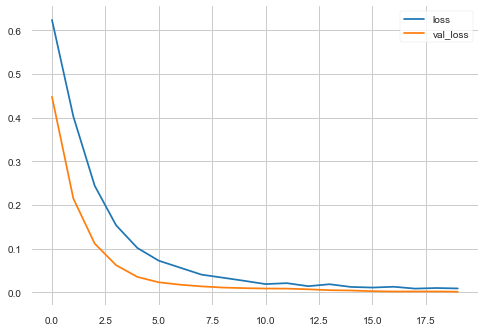

In [33]:
losses[['loss','val_loss']].plot()

#### Validation loss is nicely tapering off over a number of epochs. Let's do the predicitons with the test set and calculate the metrics via confusion_metrics and calssification_report

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [36]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       853
           1       1.00      1.00      1.00       772

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [37]:
#confusion_matrix(y_test,predictions)
confusion_matrix(predictions, y_test)

array([[853,   0],
       [  0, 772]], dtype=int64)

#### Model has predicted everything correctly. It is possible to get the same result by tweaking the number of nodes in each layer and number of epochs. Let's input   a random record and see if the model works correctly.

In [38]:
import random
random.seed(27)
random_ind = random.randint(0,len(df))

new_mushroom = df.drop('edible-poison',axis=1).iloc[random_ind]
new_mushroom

cap-shape_b    0
cap-shape_c    0
cap-shape_f    1
cap-shape_k    0
cap-shape_s    0
              ..
habitat_l      0
habitat_m      0
habitat_p      0
habitat_u      0
habitat_w      1
Name: 5312, Length: 116, dtype: uint8

In [39]:
(model.predict(new_mushroom.values.reshape(1,116))> 0.5).astype("int32")

array([[0]])

In [40]:
df.iloc[random_ind]['edible-poison']

0

#### Save the model, load it again and test to verify the model is working as expected and can be used   without rebuild. 

In [41]:
from tensorflow.keras.models import load_model
model.save('mushroom_model.h5')  

In [42]:
m1=load_model("mushroom_model.h5")

In [43]:
(m1.predict(new_mushroom.values.reshape(1,116))> 0.5).astype("int32")

array([[0]])

### Model with Logistic Regression with the same dataset

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [45]:
#Pick up feature set and the labels
X = df.drop('edible-poison',axis=1).values
y = df['edible-poison'].values

#Split the dataset into 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)


#### Fit the model

In [46]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression()

#### Make the predictions for the test data

In [47]:
predictions = logisticRegr.predict(X_test)

In [48]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

1.0


##### Model predicted perfect score. Let's cross-check the results with confusion-matrix and plot it

In [49]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[853   0]
 [  0 772]]


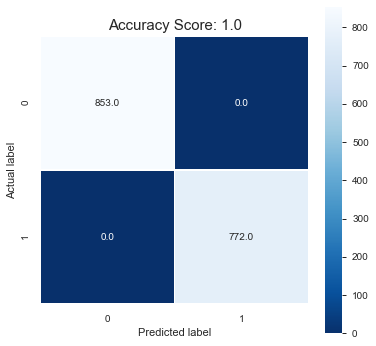

In [50]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

#### Model has predicted everything correctly.  Let's input a random record and see if the model works correctly.

In [51]:
import random
random.seed(27)
random_ind = random.randint(0,len(df))

new_mushroom = df.drop('edible-poison',axis=1).iloc[random_ind]


In [52]:
logisticRegr.predict(np.array(new_mushroom).reshape(1,-1))

array([0], dtype=int64)

In [53]:
#Prediction says '0', let's verify by checking the label
df.iloc[random_ind]['edible-poison']

0

#### Save the model, and load the model to veruify things work as expected. Here we use joblib.save and joblib.load functions

In [54]:
import joblib
# Save to file in the current working directory
joblib.dump(logisticRegr, "mushroom_model_LR.pkl")

['mushroom_model_LR.pkl']

In [56]:
m1=joblib.load("mushroom_model_LR.pkl")
res = m1.predict(np.array(new_mushroom).reshape(1,-1))

In [58]:
print(res[0])

0
